In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
%matplotlib inline

In [52]:
train= pd.read_csv('titanic_train.csv')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

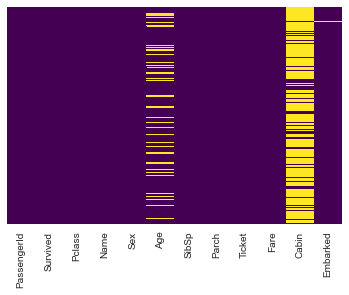

In [54]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [55]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Cabin', ylabel='count'>

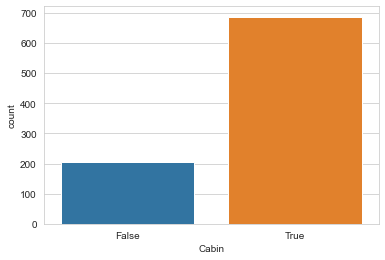

In [56]:
sns.countplot(x='Cabin',data=train.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

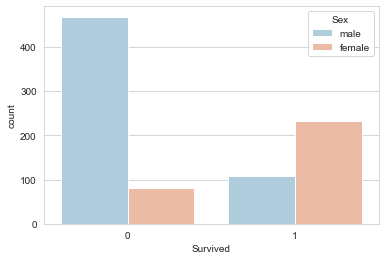

In [57]:
sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

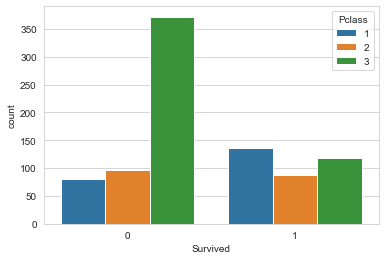

In [58]:
sns.countplot(x='Survived',data=train,hue='Pclass')

<AxesSubplot:ylabel='Frequency'>

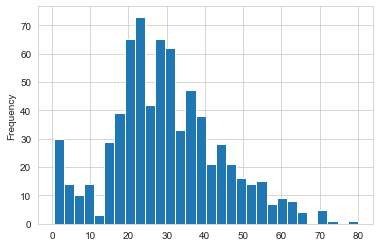

In [59]:
train['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='Age'>

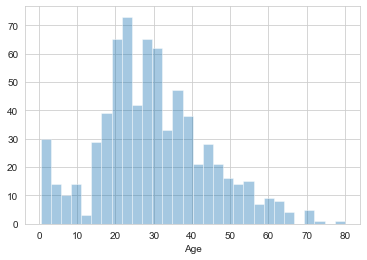

In [60]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

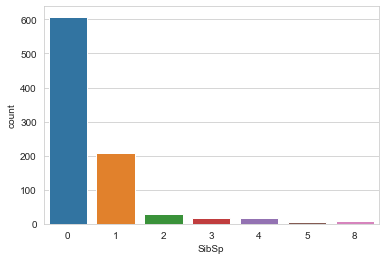

In [62]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

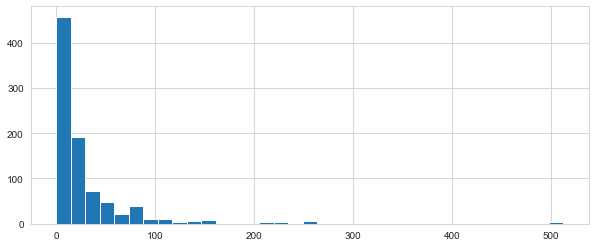

In [63]:
train['Fare'].hist(bins=35,figsize=(10,4))

In [64]:
import cufflinks as cf

In [65]:
cf.go_offline()

In [66]:
# train['Fare'].iplot(kind='hist',bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

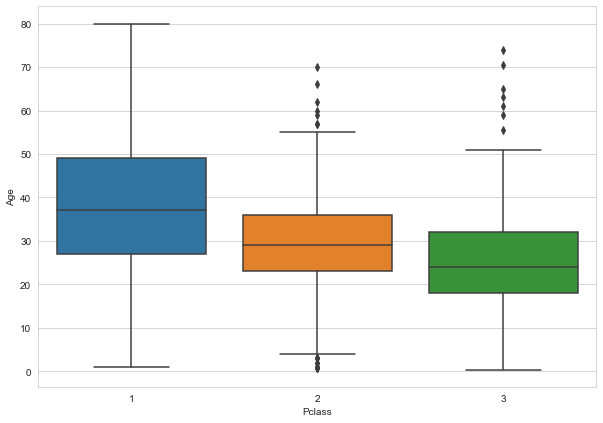

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [68]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [69]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

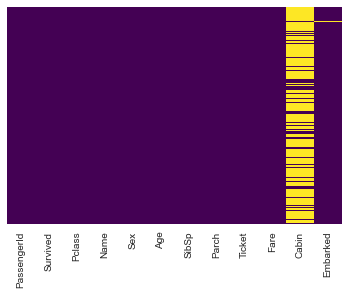

In [70]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [71]:
train.drop('Cabin',axis=1,inplace=True)

In [72]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

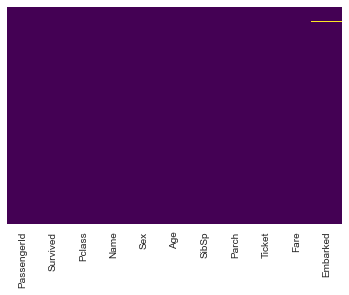

In [73]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [74]:
train.dropna(inplace=True)

<AxesSubplot:>

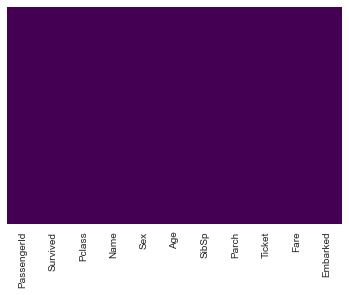

In [75]:
sns.heatmap(train.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [76]:
#converting categorical variables into dummy variables
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [77]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [78]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [79]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [80]:
pclass.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [81]:
train=pd.concat([train,sex,embark,pclass],axis=1)

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [83]:
train.drop(['Sex','Embarked','Name','Ticket','Pclass'],axis=1,inplace=True)

In [84]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [85]:
train.drop('PassengerId',axis=1,inplace=True)

In [86]:
train.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [87]:
X= train.drop('Survived',axis=1)
y=train['Survived']

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
logitmodel=LogisticRegression(max_iter=500)

In [92]:
logitmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
predictions= logitmodel.predict(X_test)

In [94]:
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 33,  71]], dtype=int64)

In [96]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

